In [1]:
# %matplotlib inline
import matplotlib
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from cpselect.cpselect import cpselect
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage import transform
from skimage.draw import polygon

## Image Warping and Mosaics

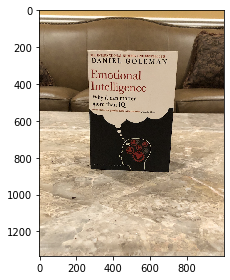

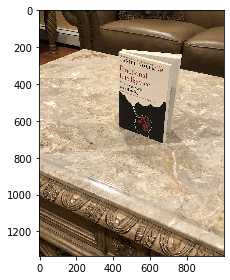

In [160]:
flat_book = "flat_book.jpg"
im1 = skio.imread(flat_book)

angled_book = "angled_book.jpg"
im2 = skio.imread(angled_book)

# convert to double (might want to do this later on to save memory)    
im1 = sk.img_as_float(im1)
im2 = sk.img_as_float(im2)
skio.imshow(im1)
skio.show()
skio.imshow(im2)
skio.show()

In [6]:
controlpointlist = cpselect("flat_book.jpeg", "angled_book.jpeg")
print(controlpointlist)

[{'point_id': 1, 'img1_x': 262.8920649004944, 'img1_y': 213.99932395318365, 'img2_x': 436.3234250221831, 'img2_y': 225.6188786073435}, {'point_id': 2, 'img1_x': 276.8355304854862, 'img1_y': 855.3987408628047, 'img2_x': 431.67560316051913, 'img2_y': 629.9793805721046}, {'point_id': 3, 'img1_x': 702.111230827735, 'img1_y': 873.9900283094604, 'img2_x': 671.038429036211, 'img2_y': 720.611906874551}, {'point_id': 4, 'img1_x': 750.9133603752061, 'img1_y': 223.29496767651153, 'img2_x': 705.8970929986904, 'img2_y': 299.9840283939661}, {'point_id': 5, 'img1_x': 272.18770862382223, 'img1_y': 537.022943338826, 'img2_x': 431.67560316051913, 'img2_y': 432.4469514513879}, {'point_id': 6, 'img1_x': 499.9309798453544, 'img1_y': 869.3422064477965, 'img2_x': 545.5472387712853, 'img2_y': 676.4575991887438}, {'point_id': 7, 'img1_x': 725.3503401360546, 'img1_y': 530.0512105463303, 'img2_x': 689.6297164828668, 'img2_y': 504.4881903071787}, {'point_id': 8, 'img1_x': 495.28315798369044, 'img1_y': 216.3232348

In [7]:
final_pts = [{'point_id': 1, 'img1_x': 262.8920649004944, 'img1_y': 213.99932395318365, 'img2_x': 436.3234250221831, 'img2_y': 225.6188786073435}, {'point_id': 2, 'img1_x': 276.8355304854862, 'img1_y': 855.3987408628047, 'img2_x': 431.67560316051913, 'img2_y': 629.9793805721046}, {'point_id': 3, 'img1_x': 702.111230827735, 'img1_y': 873.9900283094604, 'img2_x': 671.038429036211, 'img2_y': 720.611906874551}, {'point_id': 4, 'img1_x': 750.9133603752061, 'img1_y': 223.29496767651153, 'img2_x': 705.8970929986904, 'img2_y': 299.9840283939661}, {'point_id': 5, 'img1_x': 272.18770862382223, 'img1_y': 537.022943338826, 'img2_x': 431.67560316051913, 'img2_y': 432.4469514513879}, {'point_id': 6, 'img1_x': 499.9309798453544, 'img1_y': 869.3422064477965, 'img2_x': 545.5472387712853, 'img2_y': 676.4575991887438}, {'point_id': 7, 'img1_x': 725.3503401360546, 'img1_y': 530.0512105463303, 'img2_x': 689.6297164828668, 'img2_y': 504.4881903071787}, {'point_id': 8, 'img1_x': 495.28315798369044, 'img1_y': 216.32323488401562, 'img2_x': 559.4907043562771, 'img2_y': 258.1536316389909}, {'point_id': 9, 'img1_x': 430.21365192039553, 'img1_y': 627.6554696412726, 'img2_x': 510.6885748088059, 'img2_y': 513.7838340305065}, {'point_id': 10, 'img1_x': 267.53988676215835, 'img1_y': 346.4622470106053, 'img2_x': 427.0277812988552, 'img2_y': 313.92749397895795}, {'point_id': 11, 'img1_x': 267.53988676215835, 'img1_y': 416.17957493556423, 'img2_x': 429.35169222968716, 'img2_y': 355.7578907339332}, {'point_id': 12, 'img1_x': 741.6177166518783, 'img1_y': 355.7578907339332, 'img2_x': 698.9253602061947, 'img2_y': 385.9687328347486}, {'point_id': 13, 'img1_x': 736.9698947902143, 'img1_y': 425.475218658892, 'img2_x': 696.6014492753627, 'img2_y': 434.7708623822199}, {'point_id': 14, 'img1_x': 427.8897409895636, 'img1_y': 288.3644737398063, 'img2_x': 515.3363966704696, 'img2_y': 293.0122956014702}, {'point_id': 15, 'img1_x': 648.6612794185999, 'img1_y': 276.7449190856464, 'img2_x': 640.8275869353956, 'img2_y': 323.22313770228584}, {'point_id': 16, 'img1_x': 692.8155871044071, 'img1_y': 293.0122956014702, 'img2_x': 671.038429036211, 'img2_y': 339.4905142181094}, {'point_id': 17, 'img1_x': 288.455085139646, 'img1_y': 281.39274094731036, 'img2_x': 440.971246883847, 'img2_y': 274.4210081548147}, {'point_id': 18, 'img1_x': 434.8614737820595, 'img1_y': 790.3292347995098, 'img2_x': 515.3363966704696, 'img2_y': 613.7120040562808}, {'point_id': 19, 'img1_x': 539.4374656694977, 'img1_y': 790.3292347995098, 'img2_x': 571.1102590104367, 'img2_y': 634.6272024337685}, {'point_id': 20, 'img1_x': 571.9722187011452, 'img1_y': 722.935817805383, 'img2_x': 589.7015464570925, 'img2_y': 597.4446275404571}, {'point_id': 21, 'img1_x': 465.072315882875, 'img1_y': 708.9923522203912, 'img2_x': 531.6037731862934, 'img2_y': 571.8816073013055}]

In [8]:
def correspondence_to_im_pts(controlpointlist):

    im1_pts = []
    im2_pts = []
    for i in range(len(controlpointlist)):
        correspondence = controlpointlist[i]
        im1_x, im1_y = correspondence["img1_x"], correspondence["img1_y"]
        im2_x, im2_y = correspondence["img2_x"], correspondence["img2_y"]
        im1_pts.append([im1_x, im1_y])
        im2_pts.append([im2_x, im2_y])
        
    return im1_pts, im2_pts

In [40]:
#compute compute_homography transformation matrix given correspondance 
#of two triangulations
def compute_homography(im1_pts, im2_pts):
        
    x1, y1 = im1_pts[0]
    x2, y2 = im2_pts[0]
    
    pts_matrix = np.matrix([
        [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2],
        [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2]
    ])
    
    b_matrix = np.matrix([
        [x2],
        [y2]
    ])
    
    for i in range(1, len(im1_pts)):
        
        x1, y1 = im1_pts[i]
        x2, y2 = im2_pts[i]
        
        next_rows = np.matrix([
            [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2],
            [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2]
        ])
        
        next_b = np.matrix([
            [x2],
            [y2]
        ])
        
        pts_matrix = np.vstack([pts_matrix, next_rows])
        b_matrix = np.vstack([b_matrix, next_b])
    
    pts, _, _, _ = np.linalg.lstsq(pts_matrix, b_matrix)
    
    a, b, c, d, e, f, g, h = pts
    
    a = a[0,0]
    b = b[0,0]
    c = c[0,0]
    d = d[0,0]
    e = e[0,0]
    f = f[0,0]
    g = g[0,0]
    h = h[0,0]
    
    return np.matrix([
        [a, b, c],
        [d, e, f],
        [g, h, 1]
    ])

In [41]:
correspondence_pts = correspondence_to_im_pts(final_pts)
correspondence_pts

([[262.8920649004944, 213.99932395318365],
  [276.8355304854862, 855.3987408628047],
  [702.111230827735, 873.9900283094604],
  [750.9133603752061, 223.29496767651153],
  [272.18770862382223, 537.022943338826],
  [499.9309798453544, 869.3422064477965],
  [725.3503401360546, 530.0512105463303],
  [495.28315798369044, 216.32323488401562],
  [430.21365192039553, 627.6554696412726],
  [267.53988676215835, 346.4622470106053],
  [267.53988676215835, 416.17957493556423],
  [741.6177166518783, 355.7578907339332],
  [736.9698947902143, 425.475218658892],
  [427.8897409895636, 288.3644737398063],
  [648.6612794185999, 276.7449190856464],
  [692.8155871044071, 293.0122956014702],
  [288.455085139646, 281.39274094731036],
  [434.8614737820595, 790.3292347995098],
  [539.4374656694977, 790.3292347995098],
  [571.9722187011452, 722.935817805383],
  [465.072315882875, 708.9923522203912]],
 [[436.3234250221831, 225.6188786073435],
  [431.67560316051913, 629.9793805721046],
  [671.038429036211, 720.611

In [42]:
flat_pts, angled_pts = correspondence_pts

In [43]:
book1_homo_matrix = compute_homography(angled_pts, flat_pts)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [52]:
# import cv2
# h, status = cv2.findHomography(np.float32(angled_pts), np.float32(flat_pts))

In [197]:
def rectify_image(size, im1, H):
    h = np.linalg.inv(H)
    mask = np.zeros(size)

    for i in range(size[0]):

        x_coords = np.array([x for x in range(size[1])])
        y_coords = np.array([i for y in range(size[1])])
        ones = np.ones(size[1])

        matrix_ready_coords = np.vstack((x_coords, y_coords, ones))

        transformed_coords = np.dot(h, matrix_ready_coords)

        multiplier_vec = np.array(transformed_coords[2,:])

        #remove last row of homogenous coords
        transformed_coords = transformed_coords[:-1,] 

        transformed_coords = transformed_coords / multiplier_vec
        
        flat_transformed = np.array(transformed_coords)

        transformed_x_coords = np.clip(flat_transformed[0].astype(int), 0, size[1] - 1)
        transformed_y_coords = np.clip(flat_transformed[1].astype(int), 0, size[0] - 1)

        for index in range(size[2]):
            val = im1[transformed_y_coords, transformed_x_coords, index]
            mask[y_coords, x_coords, index] = val
            
    return mask

In [198]:
def rectify_homography(im1, pts1, pts2):
    H = compute_homography(pts1, pts2)
    img = rectify_image(im1.shape, im1, H)
    skio.imshow(img)
    skio.show()
    return img
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


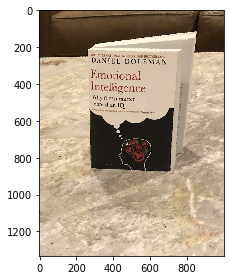

array([[[0.18039216, 0.12156863, 0.04705882],
        [0.18823529, 0.12156863, 0.05098039],
        [0.18823529, 0.12156863, 0.05098039],
        ...,
        [0.65882353, 0.57254902, 0.47843137],
        [0.64705882, 0.56078431, 0.46666667],
        [0.62352941, 0.5372549 , 0.44313725]],

       [[0.18823529, 0.12941176, 0.05490196],
        [0.19607843, 0.12941176, 0.05882353],
        [0.19607843, 0.12941176, 0.05882353],
        ...,
        [0.61960784, 0.5372549 , 0.43137255],
        [0.61960784, 0.53333333, 0.43921569],
        [0.62352941, 0.5372549 , 0.44313725]],

       [[0.18823529, 0.12941176, 0.05490196],
        [0.19607843, 0.12941176, 0.05882353],
        [0.19607843, 0.12941176, 0.05882353],
        ...,
        [0.57254902, 0.47843137, 0.37647059],
        [0.56862745, 0.4745098 , 0.37254902],
        [0.6       , 0.50588235, 0.40392157]],

       ...,

       [[0.76862745, 0.70196078, 0.6       ],
        [0.78039216, 0.70196078, 0.60392157],
        [0.78039216, 0

In [200]:
rectify_homography(im2,angled_pts,flat_pts)